<a href="https://colab.research.google.com/github/renatamontanhana/Machine_Learning_Algoritmo_Naive_Bayes_CDPRO/blob/main/M4A36_An%C3%A1lise_de_Dados_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://cienciadosdados.com/images/cdp.png)
> #   Análise Exploratória de Dados de Vendas do Marketing Place
 > #  <font color = blue> MERCADO LIVRE

![](https://certificadocursosonline.com/blog/wp-content/uploads/2020/05/como-comprar-no-mercado-livre.jpg)


--  Você é o Cientista de Dados do Mercado Livre. Seu **objetivo é realizar Análise Exploratória** dos dados deste E-commerce.

-- Para Isso, vc deve **responder algumas perguntas**,Poderosas, sobre o negócio em si.

-- **Os dados contêm centenas de milhares de compras** em lojas de eletrônicos divididas por mês, tipo de produto, custo, endereço de compra, etc. de 12 meses.

-- Vamos, inicialmente, analisar esses dados usando somente nosso querido **pandas e o matplotlib**, para análise gráfica dos dados.

In [1]:
import pandas as pd

### Leia os dados ou importe os dados

In [2]:
data=pd.read_csv('/content/Sales_data.csv')

### veja nossos dados

In [3]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Aqui vc Precisa conhecer as dimensões dos dados. Os domínios dos campos. Se existe valores ausentes ou duplicados. De boa?

In [ ]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


### Verifique o tamanho dos nossos dados usando .shape
###### Mostra o número total de registros/linhas e colunas em nosso conjunto de dados

In [ ]:
data.shape

(186850, 6)

### A função  ".columns" nos mostra o nome das colunas

In [ ]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

### A função ".index" para verificar a indexação do nosso conjunto de dados

In [ ]:
data.index

RangeIndex(start=0, stop=186850, step=1)

### A função ".nunique()" no mostra o número total de valores únicos em cada coluna do dataframe.

In [ ]:
data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

### A função ".value_counts()" nos mostra quais são esses valores únicos

In [ ]:
data['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

### verifique o "tipo de dados" (numéricos ou textuais) de nossos dados
###### .info() fornece todas as informações sobre os dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
# A função dtype mostra o type para uma variável específica
data['Price Each'].dtype

dtype('O')

### Verificar Existe algum valor ausente (missing values)

In [ ]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# Eliminar os valores missing.
## obs: Mais para frente, vc descobre que pode fazer um trabalho de substituição de valores missing, ao invés de simplesmente eliminá-lo
## O nome desse processamento se chama IMPUTAÇÃO.
data.dropna(inplace=True)

In [ ]:
data.shape

(186305, 6)

In [ ]:
data.duplicated().sum()

618

![](https://media.seudinheiro.com/uploads/2021/03/144154916_10159173164648506_4365628844580661971_o-628x353.png)

### O que é importante saber num business? Qual é o problema de negócio? Onde estão os números sensíveis do negócio. Onde entra o cash. Onde está o furo no tanque de combustível?

![](https://cienciadosdados.com/images/startse.png)

### Análise 1: Qual foi o melhor mês para vendas? Quanto foi ganho nesse mês?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
data['Month']=data['Order Date'].str[0:2]
data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [ ]:
data['Month'].astype('int32')

ValueError: ignored

In [ ]:
data=data[data['Order Date'].str[0:2] != 'Or']

In [ ]:
data['Month']=data['Order Date'].str[0:2]
data['Month'].astype('int32')

In [ ]:
data.head()

In [ ]:
look_up={'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}


data['Month']= data['Month'].apply(lambda x: look_up[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [ ]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

TypeError: ignored

In [ ]:
# Vamos converter os valores objects em float (numéricos)

# Transformar a coluna Quantity Ordered
data['Quantity Ordered']= data['Quantity Ordered'].astype('float')

# Transformar a coluna Price Each
data['Price Each']=data['Price Each'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
 7   Sales             185950 non-null  float64
dtypes: float64(3), object(5)
memory usage: 12.8+ MB


In [ ]:
highest_sales=data.groupby('Month').sum()

In [ ]:
highest_sales.head()

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558.0,3367671.02,3390670.24
Aug,13448.0,2230345.42,2244467.88
Dec,28114.0,4588415.41,4613443.34
Feb,13449.0,2188884.72,2202022.42
Jan,10903.0,1811768.38,1822256.73


In [ ]:
highest_sales.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558.0,3367671.02,3390670.24
Aug,13448.0,2230345.42,2244467.88
Dec,28114.0,4588415.41,4613443.34
Feb,13449.0,2188884.72,2202022.42
Jan,10903.0,1811768.38,1822256.73
Jul,16072.0,2632539.56,2647775.76
Jun,15253.0,2562025.61,2577802.26
Mar,17005.0,2791207.83,2807100.38
May,18667.0,3135125.13,3152606.75


In [ ]:
import matplotlib.pyplot as plt

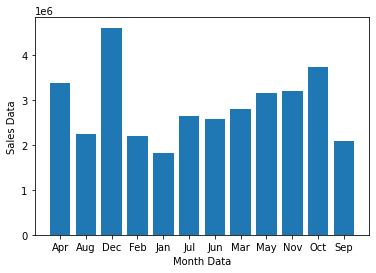

In [ ]:
plt.figure()
plt.bar(highest_sales.index,highest_sales['Sales'])
plt.xlabel('Month Data')
plt.ylabel('Sales Data')
plt.show()

### Análise 2: Qual cidade vendeu mais produto?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [ ]:
df='How,are,you'
df.split(',')

['How', 'are', 'you']

In [ ]:
data['City']=data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [ ]:
city_sold=data.groupby('City').sum()

In [ ]:
city_sold.head(10)

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602.0,2779908.20,2795498.58
Austin,11153.0,1809873.61,1819581.75
Boston,22528.0,3637409.77,3661642.01
Dallas,16730.0,2752627.82,2767975.40
Los Angeles,33289.0,5421435.23,5452570.80
New York City,27932.0,4635370.83,4664317.43
Portland,14053.0,2307747.47,2320490.61
San Francisco,50239.0,8211461.74,8262203.91
Seattle,16553.0,2733296.01,2747755.48


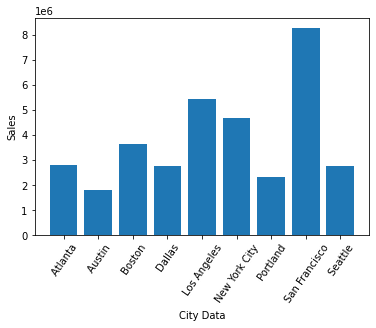

In [ ]:
#plt.show()
plt.bar(city_sold.index,city_sold['Sales'])
plt.xticks(rotation=55)
plt.xlabel('City Data')
plt.ylabel('Sales')
plt.show()

### Análise 3: A que horas devemos exibir anúncios para maximizar a probabilidade de o cliente comprar produtos?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [ ]:
data['Time']=data['Order Date'].str[9:11]

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [ ]:
time_data=data.groupby('Time').sum()
time_data

,Quantity Ordered,Price Each,Sales
Time,,,
00,4428.0,709296.70,713721.27
01,2619.0,458490.00,460866.88
02,1398.0,233833.64,234851.44
03,928.0,144726.42,145757.89
04,937.0,162058.18,162661.01
05,1493.0,229621.21,230679.82
06,2810.0,445000.11,448113.00
07,4556.0,740568.11,744854.12
08,7002.0,1185970.62,1192348.97


In [ ]:
time_data.sort_values(by=['Sales'], ascending=False)

,Quantity Ordered,Price Each,Sales
Time,,,
19,14470.0,2398588.31,2412938.54
12,14202.0,2299876.68,2316821.34
11,14005.0,2288855.18,2300610.24
20,13768.0,2268185.16,2281716.24
18,13802.0,2207696.93,2219348.30
13,13685.0,2139743.86,2155389.80
17,12229.0,2116777.02,2129361.61
14,12362.0,2072194.77,2083672.73
21,12244.0,2030763.83,2042000.86


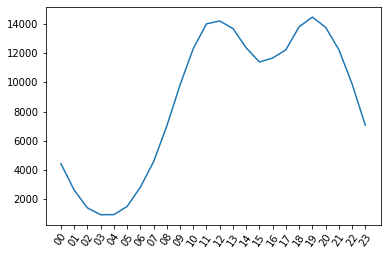

In [ ]:
plt.show()
#plt.plot(time_data.index,time_data['Sales'])
plt.plot(time_data.index,time_data['Quantity Ordered'])
plt.xticks(rotation=55)
plt.show()

### Análise 4: Quais são os produtos mais vendidos juntos?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [ ]:
duplicated_data=data[data['Order ID'].duplicated(keep=False)]

In [ ]:
duplicated_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11
31,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11


In [ ]:
duplicated_data['Product_bundle']=duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [ ]:
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Product_bundle
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [ ]:
duplicated_data=duplicated_data[['Order ID','Product_bundle']].drop_duplicates()

In [ ]:
duplicated_data.head()

,Order ID,Product_bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count=Counter()
for row in duplicated_data['Product_bundle']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(3)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447)]

### Análise 5: Qual produto mais vendeu? Por que você acha que isso aconteceu?

In [ ]:
data.head()

In [ ]:
product_max=data.groupby('Product').sum()

In [ ]:
product_max.sort_values(by=['Sales'], ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
Macbook Pro Laptop,4728.0,8030800.00,8037600.00
iPhone,6849.0,4789400.00,4794300.00
ThinkPad Laptop,4130.0,4127958.72,4129958.70
Google Phone,5532.0,3315000.00,3319200.00
27in 4K Gaming Monitor,6244.0,2429637.70,2435097.56
34in Ultrawide Monitor,6199.0,2348718.19,2355558.01
Apple Airpods Headphones,15661.0,2332350.00,2349150.00
Flatscreen TV,4819.0,1440000.00,1445700.00
Bose SoundSport Headphones,13457.0,1332366.75,1345565.43


In [ ]:
product_max.sort_values(by=['Quantity Ordered'], ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
AAA Batteries (4-pack),31017.0,61716.59,92740.83
AA Batteries (4-pack),27635.0,79015.68,106118.40
USB-C Charging Cable,23975.0,261740.85,286501.25
Lightning Charging Cable,23217.0,323787.10,347094.15
Wired Headphones,20557.0,226395.18,246478.43
Apple Airpods Headphones,15661.0,2332350.00,2349150.00
Bose SoundSport Headphones,13457.0,1332366.75,1345565.43
27in FHD Monitor,7550.0,1125974.93,1132424.50
iPhone,6849.0,4789400.00,4794300.00


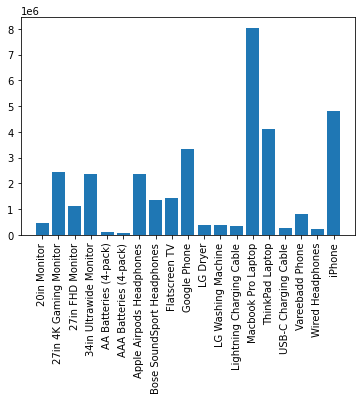

In [ ]:
plt.figure()
plt.bar(product_max.index,product_max['Sales'])
plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

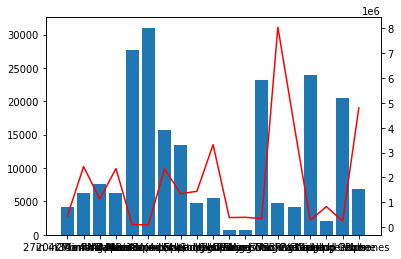

In [ ]:
plt.figure()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product_max.index,product_max['Quantity Ordered'])
plt.xticks(rotation=90)
ax2.plot(product_max.index,product_max['Sales'],color='r')
plt.show()

##É só o começo...